In [42]:
import pandas as pd
import numpy as np
import collections as co
import statistics as st
from datetime import timedelta
import datetime

from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error


from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from matplotlib import ticker
import matplotlib.pyplot as plt



In [43]:
load_model_DFNN = load_model('DFNN_Model.h5')

In [44]:
df = pd.read_csv('./Data/CTLT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-07,109.879997,113.489998,109.559998,112.750000,112.750000,750900
1,2022-04-08,112.669998,113.180000,110.419998,110.709999,110.709999,957300
2,2022-04-11,109.580002,110.000000,106.610001,107.050003,107.050003,820400
3,2022-04-12,105.980003,107.099998,99.589996,100.059998,100.059998,1824800
4,2022-04-13,99.769997,101.919998,99.769997,100.879997,100.879997,875500
...,...,...,...,...,...,...,...
246,2023-03-31,65.080002,66.000000,64.510002,65.709999,65.709999,1069900
247,2023-04-03,64.650002,65.059998,62.459999,62.919998,62.919998,1708200
248,2023-04-04,63.000000,63.740002,62.220001,62.250000,62.250000,1435100
249,2023-04-05,61.599998,62.430000,61.060001,61.619999,61.619999,1471200


In [91]:
# Lấy ra các ngày cuối cùng
last_date = df['Date'].max()
future_dates = pd.date_range(start=pd.to_datetime(last_date) + pd.DateOffset(days=1), periods=30, freq='D')

In [94]:
future_dates
# Tạo dataframe chứa dữ liệu 30 ngày tới
future_data = pd.DataFrame(index=future_dates, columns=df.columns)

# Thay thế các giá trị null bằng 0
future_data.fillna(0, inplace=True)

# Sort Date
future_data = df_future.sort_values(by='Date')


In [95]:
future_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-07,0,0,0,0,0,0
2023-04-08,0,0,0,0,0,0
2023-04-09,0,0,0,0,0,0
2023-04-10,0,0,0,0,0,0
2023-04-11,0,0,0,0,0,0
2023-04-12,0,0,0,0,0,0
2023-04-13,0,0,0,0,0,0
2023-04-14,0,0,0,0,0,0
2023-04-15,0,0,0,0,0,0


In [97]:
scaler = MinMaxScaler(feature_range=(0, 1))
#future_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Volume']])

scaled_future_data = scaler.fit_transform(future_data[['Open', 'High', 'Low', 'Volume']])

next_30_days = load_model_DFNN.predict(scaled_future_data
)
#next_30_days = scaler.inverse_transform(next_30_days)

next_30_days

1/1 [==============================] - 0s 111ms/step


array([[58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916],
       [58.985916]], dtype=float32)

In [49]:
#next_30_days = scaler.inverse_transform(next_30_days)

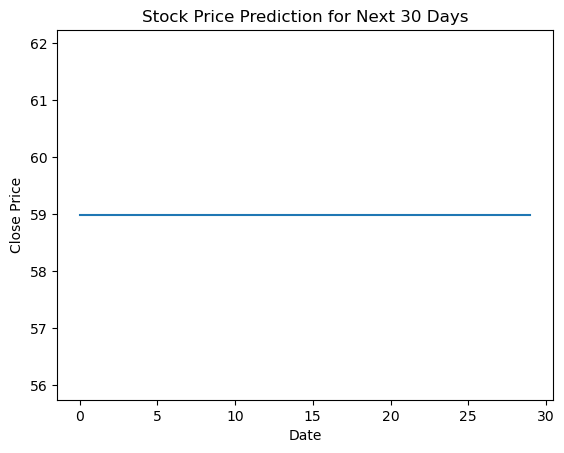

In [98]:
plt.plot(next_30_days)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction for Next 30 Days')
plt.show()

